# 8.1 Fashion Classification

In this session, we'll look at images - instead of tabular data like in the past chapters.
This time we want to predict for an image a label what is on this image. In this case we're dealing with images of clothes.
The project what we'll do is a classification project (here: multi-class classification). We want to predict if an image belongs to one of 10 different clothing categories.

Use Case: We have a website and the user wants to create a listing in the fashion category, so he wants to sell a T-Shirt. That means he uses this website and uploads a picture and there is a fashion classification service. This service will get this picture and it will reply with a suggested category (here: T-Shirt).

This classification service will contain a neural network which will look at the image and predict a category for this image.
The dataset is a clothing dataset (https://github.com/alexeygrigorev/clothing-dataset) with 5.000 images of 20 different classes. But we'll use a subset of this dataset which contains 10 most popular classes (https://github.com/alexeygrigorev/clothing-dataset-small).

This time there already train, validate, and test folders with images of this 10 classes we're interested in, so we don't have to do train-test split by our own. We just need to clone the repo.

You can find the theory behind that neural networks here: https://cs231n.github.io



In [1]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
The authenticity of host 'github.com (140.82.121.4)' can't be established.
ED25519 key fingerprint is SHA256:+DiY3wvvV6TuJJhbpZisF/zLDA0zPMSvHdkr4UvCOqU.
This key is not known by any other names
Are you sure you want to continue connecting (yes/no/[fingerprint])? ^C


# 8.1b Setting up the Environment on Saturn Cloud
Saturn Cloud offers notebooks with gpus. Use the following link to setup this.
(https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa3JlVGgydU8zZlg5Yk9UNXQ2c3RaUUJRY1BOZ3xBQ3Jtc0ttWmh5YjlhVVRHVnlIMGQ3ekpQa3RyNkJJdHUzRFdyWjY0STR5dHRWMVJ2cjE2NlVvalBwa1BFWERXUWJTaW9kZ1EwUWYtTDlzWmJwSF83RGJnWVRuWWM1bEFjdE9uT3VhdDZ4YkZVX1dib3lIMHVSaw&q=https%3A%2F%2Fbit.ly%2Fsaturn-mlzoomcamp&v=WZCjsyV8hZE)

Go to "Resources" > "New Resource from a Template" > "TensorFlow (Python)"
-> Name "clothes-classification-ml-zoomcamp" > "Create" and then > "Edit"
Go to "Extra Packages" and Select "Pip" add "scipy" --> Then "Save" it
Go to "Overview" and click "Start"

# 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading images

TensorFlow (https://www.tensorflow.org) is a library for trainin deep learning models and Keras is a higher level abstraction on top of TensorFlow. Keras makes it easier to train and use neural networks.

## Installing TensorFlow

## Loading images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

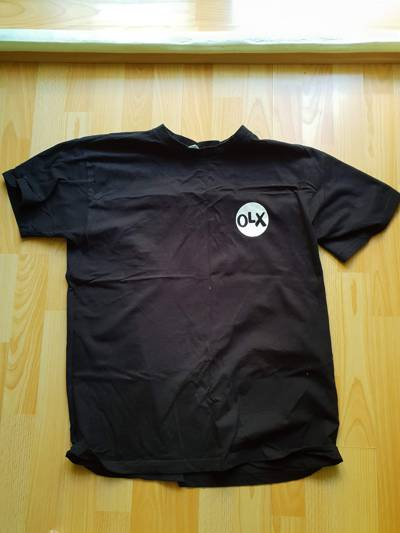

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

When loading an image you can specify the size. The reason we need to do this is a neural network expects an image of a certain size - usually 299x299, or 224x224, or 150x150. If original size of our image is bigger, than we need to resize to one of the mentioned formats.

In [6]:
img = load_img(fullname, target_size=(299, 299))

The library for processing images is called PIL (Python image library) and it's used by many libraries for processing images.

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F8593FA2E20>


The way am image is represented internally is we have three channels and for each channel we have an array. These arrays contains numbers between 0 and 255. Each pixel is a combination of the three values for channel Red, Green, and Blue.
The shape of that image should be (150, 150, 3) with (Height, Width, #Channels).

We can easily translate this pillow image into a numpy array

In [8]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

The dtype of this array is uint8 where "u" means unsigned so it doesn't have a sign, which means it goes from 0 to 255. The "8" means that it's an integer that takes 8 bits (=1 byte)

In [9]:
x.shape

(299, 299, 3)

# 8.3 Pre-trained convolutional neural networks

In this lecture we'll use a pre-trained convolutional neural network to understand what is on this image.

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

This time we want to take an image and an off-the-shelf neural network that was already trained by somebody, so we can use it.
Now we want to use a special model "Xception" from the keras link.

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [50]:
# weights = "imagenet" means we want to use pretrained network that was trained on imagenet

model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

Now we want to use this model to classify the image, we used before. But this time the model.predict function expects a bunch of images. So let's create an array with possibly multiple images. In this case it is just one.

In [51]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

To do the prediction, we need some preprocessing before. This model expects inputs in a certain way using the "preprocess_input" function.

In [52]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [53]:
pred = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [54]:
pred.shape

(1, 1000)

This 1000 means that there are 1000 different classes and 1 means there is one image.

In [55]:
pred

array([[3.23712389e-04, 1.57383955e-04, 2.13493346e-04, 1.52370616e-04,
        2.47626507e-04, 3.05036228e-04, 3.20592342e-04, 1.47499406e-04,
        2.03621996e-04, 1.49272542e-04, 1.95663044e-04, 2.10137528e-04,
        7.59265458e-05, 1.13972288e-04, 1.62683646e-04, 2.04638767e-04,
        1.97416128e-04, 1.44288846e-04, 1.40217599e-04, 1.73686087e-04,
        7.46690901e-04, 2.56966945e-04, 2.66808929e-04, 2.96514598e-04,
        3.73602583e-04, 2.77404557e-04, 2.16571192e-04, 2.27270270e-04,
        3.80813435e-04, 1.72165906e-04, 3.05401365e-04, 1.96431472e-04,
        3.92115646e-04, 4.78071743e-04, 2.91751669e-04, 3.25693574e-04,
        1.47395360e-04, 1.62362194e-04, 2.12710904e-04, 1.34028494e-04,
        2.40070673e-04, 6.75212359e-04, 2.54943763e-04, 1.44478865e-04,
        4.12821624e-04, 2.04408803e-04, 3.02958564e-04, 1.49339743e-04,
        1.99653878e-04, 2.27006007e-04, 2.93729652e-04, 2.27445038e-04,
        6.37644844e-04, 7.82616378e-04, 2.49557605e-04, 4.052709

Each value is the probability that this image belongs to some class. To be able to make sense from this output, we need to know what are the classes. Therefor we need another function called decode_predictions to make the prediction human readable.

In [56]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6819631),
  ('n02916936', 'bulletproof_vest', 0.038140077),
  ('n04370456', 'sweatshirt', 0.034324776),
  ('n03710637', 'maillot', 0.011354236),
  ('n04525038', 'velvet', 0.0018453619)]]

In real this image is a T-Shirt, but ImageNet is not very good when it comes to clothes detection. That means it doesn't really work for our purpose here. That means we need to train a different model with the classes we need for our case. Good point here, we don't have to retrain the model from scratch. We can reuse this model. That means we can build on top of what big companies or universities have provided and adapt to our specific use case.

# 8.4 Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers
There are more layers. Read here: https://cs231n.github.io/ 

Convolutional neural networks are mostly used for images and they consists of different kind of layers.
Let's imagine a CNN as a black box that gets an image and outputs prediction. What happens inside? There are different kinds of layers. The main types are convolutional layers and dense layers.

## Convolutional layers and filters
Convolutional layers consist of filters which are kind of small images. They're usually quite small images like 5x5, could be even smaller. This image filters contain simple shapes, like [^][-][/][u][ | ][\\] This is not from a real network it's just to give an understanding.
Then we take the image and take one filter and slide this filter across the image. Every time we apply the filter to an image we see how similar this filter is to the part of the image. A table is created with a lot of cells in which each cells value corresponds to the similarity of this filter to the corresponding part of the image which is a number between 0 (no similarity) and 9 (very similar). This table is called a FEATURE MAP. 

So a FEATURE MAP is the result of applying a filter to an image. 
So we slide a filter across the image and every time we calculate the similarity between this particular filter and the part of the image, we record the result and get this feature map. High values mean higher degree of similarity.
We do this steps for each filter. We have six filters here that means we'll get six feature maps.

So the output of the first convolutional layer is a set of feature maps. We can take this output and treat it as a new image that we made from the original one. Then we can have another convolutional layer that has its own set of filters it applies. Then this layer produces its own feature map. Let's say in the first convolution we used 6 filters and now in the second convolution we have 12 filters. So the second convolution produces 12 feature maps. We can easy imagine to go on with other convolutional layers with its own filters.
Because of this chaining each layer learns more and more complex filters.

image --> CONV LAYER 1 --> CONV LAYER 2 --> CONV LAYER 3 --> ...

           [^][-][/]       [<][o][>]         [(][U][)]
           
           [u][|][\\]      [L][x][+]         [?][Q][~]

           Low-Level       Mid-Level         High-Level

The second layer learns the new filters by combining the filters from the previous layer. That means with every layer you can learn more complex shapes (= more high-level features of the image).
This representation is not exactly how filters look like, but we can think of them in this way.
What filters do?
We have a filter that we apply to some area, then it looks at that reagion across all the values of all the feature maps in this particular reagion. That means it "goes in depth" here and looks at all the different feature maps. So let's assume that in one place there is a 6 in case of [/] and a 6 in case of [\\] then there is a high possibility that there is a "X" on the image in this area.

What happens when we take an image and pass it through a set of convolutional layers?
The result is a vector representation of the image. Let's say the image is 299x299x3, then the vector representation could be something like 2048, which is a one-dimensional array. This way we turn an image into a vector. This vector captures all this information about the image. So all the filters of the convolutional layers extract features from the image that contain all the information that the neural network was able to extract from the image.

## Dense layers 
What we can do with this vector representation is, we can build some dense layers. This layers turn the vector representation into final prediction. The final prediction could be a label like "t-shirt".
While the role of convolutional layers is extracting a vector representation the role of a dense layer is using the vector representation to make the final prediction.

How to get the final prediction?
The vector representation consists of many numbers (vector dimensionality could be 1024 or 2048, so it's always something to the power of 2 for some reason). Let's think of this vector as shown here:

|x1|

|x2|

|x3|

| . |

| . |

| . |

|xn|

### Binary classification problem
Using this vector we want to build a model that makes a prediction. Let's start with a *binary classification problem*. "Is this image a t-shirt or not?". The vector is x and y = {0, 1} with 0 means not a t-shirt, and 1 means a t-shirt. Here we use logistic regression. g(x)=sigmoid(xTw). x is the feature vector and we have to train a regression model to get the weights (w). The output of this would be the probability that this x is a t-shirt.
With this vector w we can make a prediction by multiplying x1*w1 + x2*w2 + ... + xn*wn. Then we take this sum and turn it into probability by using sigmoid. The output then is the probability for being a t-shirt.

### Multiple classification problem
What to do in case of multiple classes? We can build one model for each class - one for shirt, one for t-shirt, and one for dress. So we get another w vector for shirts and we can do the same for dresses. So we end up with three different w vectors each for one class. But in case of three sigmoid functions we use something different. A sigmoid for multiple classes is called softmax. The output of softmax will have three numbers (in this case here). The first number will contain the probability of x being a shirt, then the second will be the probability of x being a t-shirt and the last one for the probability of x being a dress.
So what happens here is, we put multiple logistic regressions together and as a result we got a neural network.

Dense layer

|x1|

|x2|

|x3|      | O |

| . |     | O |

| . |     | O |

| . |

|xn|

Input    Output

This layer is called a dense layer. It's dense because it connects each element of the input with all the elements of its output. For this reason, these layers are sometimes called "fully connected".
Each of the output elements has its own w (w1, w2, w3), so there is a W:

    |--w1--|
 
W = |--w2--|

    |--w3--|

All we need to do to transform the column vector x to the output is W*x. That means the dense layer is a matrix multiplication.

We can put multiple dense layers together. Then we have an inner dense layer and an outer dense layer.

## Summary
To summarize we have the following steps from image to prediction.

image --> conv layers --> vector representation --> dense layers --> prediction

This gives just a high-level overview about the internals of convolutional neural networks. There are many other internals and other layers as well. For more in-depth knowledge check the notes of the course "CS231n Convolutional Neural Networks for Visual Recognition" (cs231n.github.io).
There is one important layer that hasn't covered here, the "pooling layer". The purpose of this layer is that we can reduce the size of convolutional layers. The reason for doing this is reducing the size leads to having fewer parameters. You can for example reduce a 200x200 into a 100x100 image. Especially this layer is described very good in the course notes of CS231n.

# 8.5 Transfer learning 

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150) (Better to run it with a GPU)

This time we want to use an already trained network that was trained on ImageNet. The filters that were learned are quite generic so they can be used for many purposes. The model learned to take an image and convert it into a vector representation. This part (without dense layers) is quite generic and we don't really change it for our task. To train these filters in the convolution layers is very difficult because a lots of images is needed. Then there is a bunch of dense layers after the conversion into vector representation for making the final prediction. This second part of dense layers this is specific to the dataset that is used. In this case its specific to ImageNet and that dataset is trained on 1000 different classes, which we don't need for out task. While the vector representation is very useful the dense layers are not. So we don't need the second part. That means we keep the convolutional layers but we want to train new dense layers. This is the idea behind transfer learning.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

Use image size of 150x150 to experiment faster, because to train 299x299 needs four times more.
That means to train model faster we will use smaller images and then at the end we will retrain bigger images.
batch_size means how many images are needed at once. The shape will be (32, 150, 150, 3). Then the batch will go through convolutional layers and then we will have 32 vectors and also 32 predictions at the end.

In [13]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


For now we see that 3068 were found belonging to 10 classes. To see which classes are there we can use:

In [60]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

The names are inferred from the folder structure. That means everything that is inside the folder t-shirt is put under the t-shirt class.

In [64]:
# !ls -l clothing-dataset-small/train
!ls clothing-dataset-small/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


Then we can look at what this dataset generates. We use an iterator to be able to get the next batch. (A for-loop does this internally).

In [65]:
next(train_ds)

(array([[[[ 0.03529418, -0.09803921, -0.30196077],
          [ 0.05098045, -0.08235294, -0.2862745 ],
          [ 0.06666672, -0.06666666, -0.27058822],
          ...,
          [ 0.07450986, -0.05882353, -0.26274508],
          [ 0.02745104, -0.10588235, -0.3098039 ],
          [ 0.04313731, -0.09019607, -0.29411763]],
 
         [[ 0.04313731, -0.09019607, -0.29411763],
          [ 0.06666672, -0.06666666, -0.27058822],
          [ 0.082353  , -0.05098039, -0.25490195],
          ...,
          [ 0.09803927, -0.03529412, -0.23921567],
          [ 0.14509809,  0.01176476, -0.19215685],
          [ 0.09803927, -0.03529412, -0.23921567]],
 
         [[ 0.07450986, -0.05882353, -0.26274508],
          [ 0.09019613, -0.04313725, -0.24705881],
          [ 0.09019613, -0.04313725, -0.24705881],
          ...,
          [ 0.12156868, -0.01176471, -0.21568626],
          [ 0.10588241, -0.02745098, -0.23137254],
          [ 0.09019613, -0.04313725, -0.24705881]],
 
         ...,
 
         [[ 

This returns two things. It returns our features the images and then y which are the labels.

In [74]:
X, y = next(train_ds)

The output of X is nothing new. What happens here is a bunch of images is loaded and then the function "preprocess_input" function is applied.

In [75]:
X

array([[[[ 0.30980396,  0.20784318,  0.13725495],
         [ 0.30980396,  0.16078436,  0.20784318],
         [ 0.22352946,  0.04313731,  0.10588241],
         ...,
         [ 0.20000005,  0.16078436,  0.21568632],
         [ 0.18431377,  0.17647064,  0.22352946],
         [ 0.18431377,  0.19215691,  0.2313726 ]],

        [[ 0.09019613,  0.04313731,  0.04313731],
         [ 0.11372554,  0.0196079 ,  0.11372554],
         [ 0.12941182,  0.02745104,  0.10588241],
         ...,
         [ 0.2313726 ,  0.1686275 ,  0.27058828],
         [ 0.21568632,  0.1686275 ,  0.24705887],
         [ 0.20000005,  0.17647064,  0.2313726 ]],

        [[ 0.05882359,  0.05098045,  0.09019613],
         [ 0.082353  ,  0.0196079 ,  0.13725495],
         [ 0.12941182,  0.03529418,  0.11372554],
         ...,
         [ 0.2941177 ,  0.20000005,  0.2941177 ],
         [ 0.23921573,  0.16078436,  0.2313726 ],
         [ 0.2313726 ,  0.15294123,  0.21568632]],

        ...,

        [[-0.01176471, -0.09019607, -0

To look at the shape of X, we see that is exactly what we expect here.

In [76]:
X.shape

(32, 150, 150, 3)

In [78]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

For the labels one-hot encoding is used. As we have seen before the last column with index 9 is for t-shirts. So we have 3 t-shirts, 1 pents, and 1 shoes examples. This is how we do multi-class classification. You can also think of this as 10 different binary variables and then fitting 10 different models. In real it's only one but you can conceptually think like this.

In [77]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

Let's also do this for the validation set by copying the code from training set. One difference here is not shuffeling the validation data, since we only use it for validating doesn't need to shuffle. That means the images come in the same order every time. 

In [14]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


The output is very similar as seen before. It founds 341 images belonging to the same 10 known classes.

So far for reading the data, now let's train a model. base_model here means that we take the convolution part of the Xception model that was trained on ImageNet and then train our custom model on top of that. This will have 10 classes.

To only keep the convolutional layers there is a parameter include_top that we need to set to false. "top" could be a bit confusing, but Keras stacks layers conceptionally from bottom to top. That means on top there are the dense layers.

Next important point is we don't want to train this model, we only want to use it for extracting the vector representation. With "base_model.trainable = False" we can define the model as not trainable. That means when we train our model, we don't want to change the convolutional layers (=freezing the convolutional layers).

In [80]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

83683744/83683744 [==============================] - 30s 0us/step


Next thing to do is creating a new top. First thing is specifying the input. Input is the part of the model that receive the images. This input then goes to the base model which we use to extract the vector representation.

In [82]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
outputs = base
model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [83]:
preds.shape

(32, 5, 5, 2048)

What we get here is a 4-dimensional shape. 32 is the batch size. So for each image we've got a 5x5x2048 representation which doesn't look like a vector representation yet. So what we need to do now is turning this to a bunch of vectors. We can do this while chunking the 5x5x2048 representation in slices of size 5x5 and put the average of this 25 values to a one-dimensional vector. This reduction of dimensionality is called pooling. In this case here we use average pooling - more concrete we do a 2D average pooling. In Keras we can do this pooling as shown in the next snippet.

In [84]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = vectors

model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [85]:
preds.shape

(32, 2048)

In [90]:
# Shorter form in functional style. That's the way how we view the neural network.
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [91]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 3s 3s/step


(32, 2048)

In [92]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [93]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 3s 3s/step


(32, 10)

To summarize what we've done so far (for one image). We have our t-shirt (150x150x3) as input. Applying the base_model on inputs gives us the "base" (5x5x2048). Applying pooling on "base" we turn this into a one-dimensional vector (2048). On top of this we added the dense layer, which turns the vector representation into predictions. The dimensionality of this is 10 because we have 10 classes. This is what goes to the outputs variable. "outputs" is what we will have when we invoke predict and the input is the X.

In [103]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 [==============================] - 2s 2s/step


(32, 10)

In [104]:
preds[0]

array([-0.03203598,  1.0506403 ,  1.5579934 , -0.47385398, -0.23905472,
        0.09166865, -1.2453439 , -0.7762855 ,  0.75367785,  0.5877316 ],
      dtype=float32)

What's important here the model outputs here just random numbers because we haven't trained the model yet. The reason for this is, when creating a dense layer it's initialized with random numbers. That means we now have to train the model.

To train a model we need to have some things.
First we need an optimizer which finds the best weights for the model. For more information on optimizers look at the documentation (https://keras.io/api/optimizers). But also the CS231n course is a great reference for more information on that (https://cs231n.github.io/)
The learning rate here is similar to eta in case of XGBoost.
Then the optimizer needs to evaluate the changes are, therefor we need a concept that is called loss. Keras has some different kind of losses. Because we have a multi-class classification problem we use "CategoricalCrossentropy". For binary classification problem we would use BinaryCrossentropy, and for regression problems we would use MeanSquaredError. CategoricalCrossentropy outputs just a number - the lower the better. The optimizer is trying to optimize this number to make it as low as possible. How the optimizer is doing this? The optimizer can change the parameters of the dense layers.
There is an important parameter "from_logits" which is set to "True". The documentation says "Whether 'y_pred' is expected to be a logits tensor. By default, we assume that 'y_pred' encodes a probability distribution. Note: Using from_digits=True may be more numerically stable."
Let's try to explain what's happening here.
When we talked about dense layers, then there was an input and an output layer. We applied softmax to this output. This softmax is called "activation". It takes the output from the output layer as input and turns it into a probability. And exactly this input is called "logits" which is the raw output of the dense layer before applying softmax. If we have softmax then we have probabilities, if we don't have softmax we have raw score. Here we want to use raw score so we set that value to True. That means we don't use activation here. In case we need probabilities we can set that value to False. But then we must change the dense layer code from

outputs = keras.layers.Dense(10)(vectors)          to          outputs = keras.layers.Dense(10, activation='softmax')(vectors)

But we stay with true and left the other code unchanged.

Now we need to compile the model before we can start training it. For compiling we need the optimizer and the loss that we defined before.
We're also interested in monitoring a special metric which is accuracy. At each step of training it will show the progress.

In [105]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Now everyrthing is ready for training the model. Here we use the model.fit method which need the training data, the epoch count for how many epochs the model should be trained and the validation data. One epoch means that we go over the whole training dataset once, not image by image, but in batches of size 32 as we have defined before. Last batch can be less than this predefined size of 32 images. When training a model we apply to one batch at a time and when it's done for all batches we call this one epoch. 10 epoch for example means go over the data 10 times.

The output shows the current loss which is CategoricalCrossentropy and the accuracy for each epoch.

In [96]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 152s 2s/step - loss: 1.3336 - accuracy: 0.6617 - val_loss: 0.7325 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 163s 2s/step - loss: 0.5488 - accuracy: 0.8240 - val_loss: 0.8414 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 125s 1s/step - loss: 0.3361 - accuracy: 0.8836 - val_loss: 0.7177 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 121s 1s/step - loss: 0.2275 - accuracy: 0.9214 - val_loss: 0.7611 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 148s 2s/step - loss: 0.1337 - accuracy: 0.9524 - val_loss: 0.7521 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 147s 2s/step - loss: 0.1041 - accuracy: 0.9654 - val_loss: 0.8706 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 141s 1s/step - loss: 0.0984 - accuracy: 0.9658 - val_loss: 0.9092 - val_accuracy: 0.7977
Epoch 8/10
96

This time we want to access the loss and accuracy values. In case of XGBoost we needed to capture the output but here we don't need to do this because the model.fit method returns an history object which contains all this information.

In [106]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 140s 1s/step - loss: 1.2547 - accuracy: 0.6799 - val_loss: 1.0608 - val_accuracy: 0.7185
Epoch 2/10
96/96 [==============================] - 137s 1s/step - loss: 0.5159 - accuracy: 0.8295 - val_loss: 0.7736 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 124s 1s/step - loss: 0.3355 - accuracy: 0.8797 - val_loss: 0.8798 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 134s 1s/step - loss: 0.2076 - accuracy: 0.9263 - val_loss: 0.9194 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 135s 1s/step - loss: 0.1612 - accuracy: 0.9423 - val_loss: 0.8815 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 144s 1s/step - loss: 0.1053 - accuracy: 0.9606 - val_loss: 0.9155 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 146s 2s/step - loss: 0.0855 - accuracy: 0.9743 - val_loss: 0.8817 - val_accuracy: 0.8123
Epoch 8/10
96

The training loss is decreasing and the accuracy for validation in the first epoch is 72%.
Comparing the training accuracy with the validation accuracy we see both values increasing over time until epoch 3. There is a discrepancy between both accuracy values. There is a difference of about 10%. Another thing is that training accuracy keeps improving but on the validation data not so much. That could mean that the model starts to overfit already. When we look at validation accuracy we see that it oscillates around 80%. In the same time the accuracy on training data is very high (it's almost 1).
That are really good signs for an overfitting model.

The results are saved in the history object. We're interested in training accuracy and validation accuracy.

In [113]:
history.history['accuracy']
#history.history['val_accuracy']

[0.6799217462539673,
 0.829530656337738,
 0.879726231098175,
 0.9263363480567932,
 0.942307710647583,
 0.9605606198310852,
 0.974250316619873,
 0.991525411605835,
 0.9788135886192322,
 0.9853324890136719]

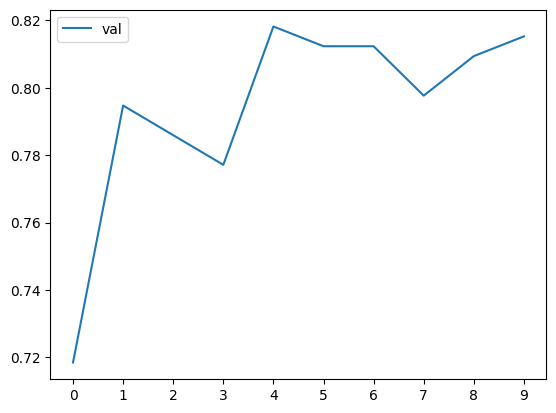

In [114]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

The first peak is after one epoch. Maybe the best model is after 4 epochs because the training accuracy is still not very high (<95%). But the model after one epoch is already quite ok. This value of almost 80% is a good one because it's without any tuning. There are many parameters to tune. We'll tune the most important one in the next section.

## 8.6 Adjusting the learning rate
- What's the learning rate

Let's use an analogy. Imagine that learning rate is how fast you can read and you read one book per quarter. That means you can read 4 books per year. Somebody else can read 1 book per day, so he can read many books per year. But maybe he is just skimming through them and looking at the table of content or just flipping the book through and looking at the concepts there. But when he tries to apply this readings, he cannot remember a lot.
Somebody else reads just one book per year and she reads very slow and takes some notes very carefully. This way she makes sure that she remember everything then she learns really well.
The many-books reader is similar to a high learning rate. This could be too fast. The expected performance on validation data could be poor, because the model tends to overfit.
The 4-books reader is similar to medium learning rate. This could be ok. The expected performance on validation data could be good.
And the last reader is similar to low learning rate. This is very effective but very very slow. The expected performance on validation data could be poor, because the model tends to underfit.

- Trying different values

Therefor we use the code from the previous section and put it to a function. The middle part of this function could be separated to a function called "create_architecture", but we'll keep it simple here.

In [15]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

We want to iterate over different values of learning rate.

In [16]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 135s 1s/step - loss: 1.9380 - accuracy: 0.3523 - val_loss: 1.6440 - val_accuracy: 0.4399
Epoch 2/10
96/96 [==============================] - 127s 1s/step - loss: 1.4122 - accuracy: 0.5306 - val_loss: 1.2856 - val_accuracy: 0.5660
Epoch 3/10
96/96 [==============================] - 135s 1s/step - loss: 1.1628 - accuracy: 0.6232 - val_loss: 1.0895 - val_accuracy: 0.6745
Epoch 4/10
96/96 [==============================] - 138s 1s/step - loss: 1.0163 - accuracy: 0.6718 - val_loss: 0.9715 - val_accuracy: 0.6979
Epoch 5/10
96/96 [==============================] - 137s 1s/step - loss: 0.9194 - accuracy: 0.7040 - val_loss: 0.8962 - val_accuracy: 0.7214
Epoch 6/10
96/96 [==============================] - 132s 1s/step - loss: 0.8488 - accuracy: 0.7223 - val_loss: 0.8406 - val_accuracy: 0.7449
Epoch 7/10
96/96 [==============================] - 136s 1s/step - loss: 0.7952 - accuracy: 0.7451 - val_loss: 0.8006 - val_accuracy: 0.7654
Epoch 

In [ ]:
del scores[0.1]
del scores[0.0001]

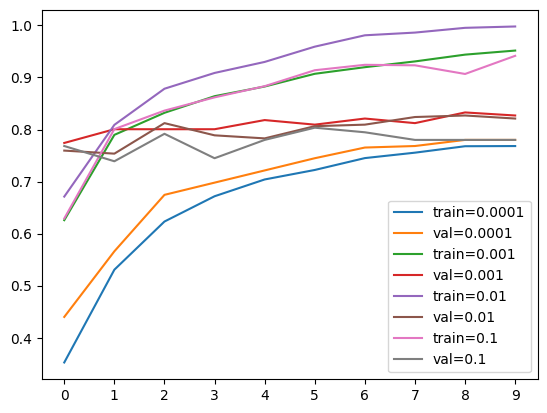

In [18]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [19]:
learning_rate = 0.001

What we did so far we tried different models with different learning rates and the we choose this one that is best on validation data. Another interesting thing is comparing the difference between train and validation data between different learning rates - the smaller the better.

## 8.7 Checkpointing

Checkpointing is a way of saving our model after each iteration or when certain conditions are met, f.e. when the model achieves the best performance so far. This is a nice way because when the model starts to oscillate, the model after 10 iterations is not necessarily the best one.

- Saving the best model only

How can we do this? After each epoch we trained we can evaluate the performance of the model on validation dataset. This we do for every epoch, then we look at the numbers and can invoke a callback. With this callback we can do anything we want. The evaluation on validation data is kind of callback. The history with all information is also kind of such a callback. This is just something we invoke after each epoch finishes

- Training a model with callbacks

In [20]:
model.save_weights('model_v1.h5', save_format='h5')

In [21]:
# Keras uses this template for saving files.
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

'xception_v1_03_0.840.h5'

In [22]:
# save_best_only=True to save only when it's an improvement regarding the last best result.
# mode='max' because we want to have a maximized accuracy, if we would use a loss value we should take mode='min'
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

Now we can use this defined callback and retrain the best model using this callback.

In [23]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1087 - accuracy: 0.6222

/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 130s 1s/step - loss: 1.1087 - accuracy: 0.6222 - val_loss: 0.7088 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 129s 1s/step - loss: 0.6355 - accuracy: 0.7816 - val_loss: 0.6039 - val_accuracy: 0.8240
Epoch 3/10
96/96 [==============================] - 118s 1s/step - loss: 0.5099 - accuracy: 0.8279 - val_loss: 0.5655 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 129s 1s/step - loss: 0.4284 - accuracy: 0.8647 - val_loss: 0.5607 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 134s 1s/step - loss: 0.3777 - accuracy: 0.8814 - val_loss: 0.5315 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 122s 1s/step - loss: 0.3263 - accuracy: 0.9055 - val_loss: 0.5289 - val_accuracy: 0.8328
Epoch 7/10
96/96 [==============================] - 119s 1s/step - loss: 0.2888 - accuracy: 0.9201 - val_loss: 0.5177 - val_accuracy: 0.8328
Epoch 8/10
96/96 [======

## 8.8 Adding more layers

It's possible to add more inner layers after the vector representation. Previously we had one inner layer before outputting the prediction. This layer does some intermediate processing of the vector representation. These inner layers make the neural network more powerful. 

- Adding one inner dense layer

Usually adding one or two additional layers help and this is something we want to test. This layer we want to add is between the previous input and output. Let's add one inner dense layer with size of 100. For this new layer we need an activation. In neural networks each layer should have some transformation in order to achieve better performance. We will use here "relu" as activation function.

Activation functions:
- SIGMOID (mostly used for output)
- SOFTMAX (mostly used for output)
- RELU (mostly used for intermediate layers, default value)
- ...
For more information on that topic look check again the mentioned CS231n course (Neural Networks Part 1: Setting up the Architecture -> Commonly used activation functions)

To see how much gpu is utilized you can open a terminal right from Jupyter notebook and type "nvidia-smi"

- Experimenting with different sizes of inner layer

In [24]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 129s 1s/step - loss: 1.5733 - accuracy: 0.5059 - val_loss: 1.1653 - val_accuracy: 0.6422
Epoch 2/10
96/96 [==============================] - 138s 1s/step - loss: 1.0018 - accuracy: 0.6819 - val_loss: 0.8641 - val_accuracy: 0.7302
Epoch 3/10
96/96 [==============================] - 126s 1s/step - loss: 0.7346 - accuracy: 0.7578 - val_loss: 0.7169 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 140s 1s/step - loss: 0.5920 - accuracy: 0.8087 - val_loss: 0.6570 - val_accuracy: 0.7889
Epoch 5/10
96/96 [==============================] - 141s 1s/step - loss: 0.4967 - accuracy: 0.8380 - val_loss: 0.6240 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 127s 1s/step - loss: 0.4258 - accuracy: 0.8677 - val_loss: 0.5924 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 140s 1s/step - loss: 0.3719 - accuracy: 0.8882 - val_loss: 0.6352 - val_accuracy: 0.7918
Epoch 8/10

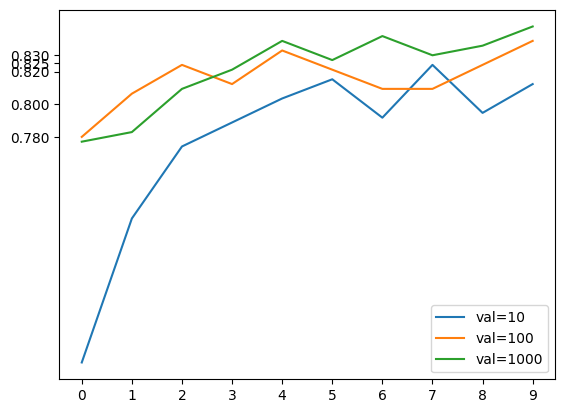

In [26]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

When we cannot see an improvement compared to the less complex model then it's fine to go with this easier one. But in the next section we want to look at the effects of regularization and dropout so let's use the more complex neural network for now.

## 8.9 Regularization and dropout

When training a model for 10 epochs, then the model will see the same image 10 times. If there is a special sign like a logo, the model recognize it and tend to declare everything as t-shirt that has that logo. That means the model could make many mistakes in classification in validation data. That leads to a worse generalization capability. Instead the model should look at more general things like shapes instead of specific details.
What if we could randomly hide a part of the image? That is the main idea behind dropout.
But in dropout we not really hide a part of the image but a part of the input. That means it applies the idea to inner layers.
Let's assume one fully connected dense layer with four inputs and three outputs. Dropout means that we freeze a part of this layer. That means that the frozen part does not get updated when running the current iteration. In the next iteration another part is frozen. By doing this we force the neural network to focus on the bigger picture (shape instead of details). But the output of the neural network still gets all flares. That means the output layer still looks at all parts - also the frozen ones.

Regularization means that we introduce something that doesn't let the neural network overfit to some patterns that might not exist. "droprate=0.5" means that in each iteration we freeze 50% of this layer. Dropout keeps the dimensionality of the layer. 

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [27]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

The downside of dropout is that you'll need more iterations to learn something. Therefor we change the value from 10 to 30.

In [28]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 128s 1s/step - loss: 0.9759 - accuracy: 0.6659 - val_loss: 0.6152 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 102s 1s/step - loss: 0.5078 - accuracy: 0.8233 - val_loss: 0.6221 - val_accuracy: 0.7859
Epoch 3/30
96/96 [==============================] - 104s 1s/step - loss: 0.3430 - accuracy: 0.8908 - val_loss: 0.5946 - val_accuracy: 0.7977
Epoch 4/30
96/96 [==============================] - 102s 1s/step - loss: 0.2449 - accuracy: 0.9237 - val_loss: 0.5580 - val_accuracy: 0.8211
Epoch 5/30
96/96 [==============================] - 114s 1s/step - loss: 0.1836 - accuracy: 0.9475 - val_loss: 0.5811 - val_accuracy: 0.8182
Epoch 6/30
96/96 [==============================] - 101s 1s/step - loss: 0.1256 - accuracy: 0.9716 - val_loss: 0.5500 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 105s 1s/step - loss: 0.0816 - accuracy: 0.9847 - val_loss: 0.5379 - val_accuracy: 0.8211
Epoch 8/3

Epoch 29/30
96/96 [==============================] - 103s 1s/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.7599 - val_accuracy: 0.8299
Epoch 30/30
96/96 [==============================] - 103s 1s/step - loss: 0.0158 - accuracy: 0.9974 - val_loss: 0.7727 - val_accuracy: 0.8182


0.5
Epoch 1/30
96/96 [==============================] - 110s 1s/step - loss: 1.2975 - accuracy: 0.5593 - val_loss: 0.7498 - val_accuracy: 0.7537
Epoch 2/30
96/96 [==============================] - 101s 1s/step - loss: 0.8512 - accuracy: 0.7053 - val_loss: 0.6457 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 102s 1s/step - loss: 0.7035 - accuracy: 0.7487 - val_loss: 0.5934 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 104s 1s/step - loss: 0.6006 - accuracy: 0.7859 - val_loss: 0.5974 - val_accuracy: 0.8035
Epoch 5/30
96/96 [==============================] - 100s 1s/step - loss: 0.5212 - accuracy: 0.8178 - val_loss: 0.5440 - val_accuracy: 0.8299
Epoch

Epoch 27/30
96/96 [==============================] - 103s 1s/step - loss: 0.6700 - accuracy: 0.7311 - val_loss: 0.5816 - val_accuracy: 0.8065
Epoch 28/30
96/96 [==============================] - 100s 1s/step - loss: 0.6821 - accuracy: 0.7275 - val_loss: 0.6171 - val_accuracy: 0.8006
Epoch 29/30
96/96 [==============================] - 100s 1s/step - loss: 0.6695 - accuracy: 0.7402 - val_loss: 0.5769 - val_accuracy: 0.8211
Epoch 30/30
96/96 [==============================] - 100s 1s/step - loss: 0.6575 - accuracy: 0.7324 - val_loss: 0.5613 - val_accuracy: 0.8240




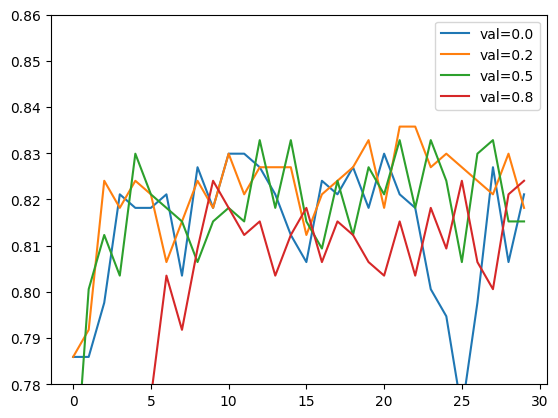

In [29]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

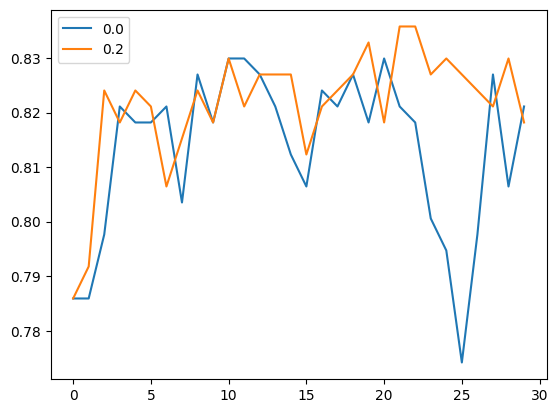

In [30]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

In the last section we talked about how to stabilize the network performance while we use dropout. This way we focus on overall shape instead of focussing on details like logos. It works because in each epoch another part of the network (not of the image) is hided/frozen. So small details like logos become more irrelevant.

Data augmentation is another approach for solving this problem which involves generating more images from existing ones. Let's imagine we take our t-shirt image and generate 10 more images, so then the neural network will not see exactly the same image every time.

- Different data augmentations

There are different possible image transformations, that are also combinable:
- Flip an image vertically and horizontally
- Rotate an image
- Shift an image
- Shear ab image (for example only move the upper right and lower right corners)
- Zoom in or out a bit (is like shrinking and extending)
- Change an image in other ways like brightness or contrast
- black patch (This means what I used to illustrate dropout. There is really a black patch that is randomly put on an image. That really hides a part of the image)

In Keras there is an image data generator. There is also a Jupyter notebook in mlbookcamp-code repository under chapter-07-neural-nets/07-augmentations.ipynb.

- Training a model with augmentations

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    shear_range=10,
    zoom_range=0.1,
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
)

How to select data augmentations?

- Use your own judgement (does is make sense?) --> For example if you don't expect to see horizontally flipped images, then this wouldn't make sense here as well.
- Look at the dataset, what kind of variations are there?
    - Are the objects always centered? --> If not you can think about shifting and rotation.
- Tune it as a hyperparameter - Try different augmentations and see what works and what doesn't.
    - Train it with new augmentation for 10-20 epochs. If it's better then use it, if not then don't use it. If it's the same or similar result then train for some more epochs (like 20) and make the comparison again.
    
Playing around with the parameters of the previous snippet, the working parameters decrease a bit. The parameters can be applied to the training dataset, but we leave the validation dataset unchanged, because we want to have consistent results. Remember the parameter changes happen randomly and cannot be reproduced.

In [33]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [34]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 146s 1s/step - loss: 1.3221 - accuracy: 0.5645 - val_loss: 0.7635 - val_accuracy: 0.7478
Epoch 2/50
96/96 [==============================] - 145s 2s/step - loss: 0.9227 - accuracy: 0.6868 - val_loss: 0.6985 - val_accuracy: 0.7742
Epoch 3/50
96/96 [==============================] - 140s 1s/step - loss: 0.8057 - accuracy: 0.7210 - val_loss: 0.6810 - val_accuracy: 0.7742
Epoch 4/50
96/96 [==============================] - 146s 2s/step - loss: 0.7150 - accuracy: 0.7546 - val_loss: 0.6494 - val_accuracy: 0.7801
Epoch 5/50
96/96 [==============================] - 144s 1s/step - loss: 0.6631 - accuracy: 0.7744 - val_loss: 0.6269 - val_accuracy: 0.7947
Epoch 6/50
96/96 [==============================] - 141s 1s/step - loss: 0.6290 - accuracy: 0.7810 - val_loss: 0.6073 - val_accuracy: 0.8035
Epoch 7/50
96/96 [==============================] - 172s 2s/step - loss: 0.5617 - accuracy: 0.8093 - val_loss: 0.5982 - val_accuracy: 0.7889
Epoch 8/50
96

When doing augmentation it can happen, that the utilization of the GPU is not >90%. The reason could be that the augmentation is done by the CPU. After generating the new images, the GPU can fit the model. This is done for every epoch. To avoid that there are some complex things. While doing augmenting and fitting in a sequential order (first CPU: augmentation, second GPU: fitting) the CPU can start the second augmentation process right after the first one, then CPU and GPU are more utilized over time. Keras doesn't do this, but there are ways of doing this.
(Google: tensorflow training pipeline with preprocessing -> tensorflow.org/guide/data_performance, and tensorflow.org/guide/data

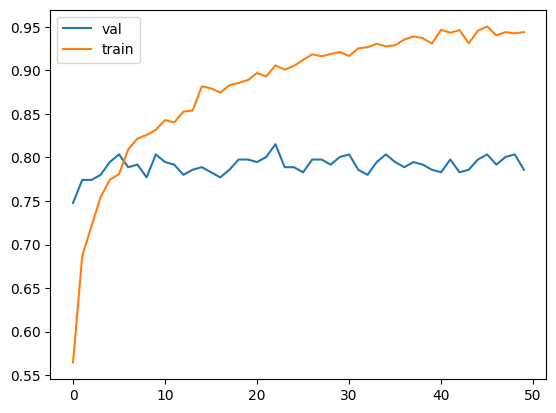

In [35]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

Doing this testing with data augmentation we realize that this is not really helpful in this case, usually it is. Alexey said "Tuning neural networks is more art than science". For this case here we can go with our untuned network that has an accuracy of around 84% which is sufficient for most of the use cases.

## 8.11 Training a larger model

In the sections before we use images of size 150x150 because the model can be trained faster (here:4 times faster). This is a good way when experimenting with parameters. Now we want to train on bigger images - let's use images of size 299x299. Therefor we reuse the previous code for training and do a few changes.
We will use a new parameter input_size with default value of 150.

- Train a 299x299 model

In [36]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
input_size = 299

In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [39]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 1.0308 - accuracy: 0.6734

/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 574s 6s/step - loss: 1.0308 - accuracy: 0.6734 - val_loss: 0.5814 - val_accuracy: 0.8152
Epoch 2/50
96/96 [==============================] - 572s 6s/step - loss: 0.5457 - accuracy: 0.8106 - val_loss: 0.4663 - val_accuracy: 0.8416
Epoch 3/50
96/96 [==============================] - 546s 6s/step - loss: 0.4452 - accuracy: 0.8494 - val_loss: 0.4256 - val_accuracy: 0.8446
Epoch 4/50
96/96 [==============================] - 582s 6s/step - loss: 0.3916 - accuracy: 0.8686 - val_loss: 0.3761 - val_accuracy: 0.8798
Epoch 5/50
96/96 [==============================] - 553s 6s/step - loss: 0.3560 - accuracy: 0.8758 - val_loss: 0.3749 - val_accuracy: 0.8886
Epoch 6/50
96/96 [==============================] - 550s 6s/step - loss: 0.3244 - accuracy: 0.8882 - val_loss: 0.4026 - val_accuracy: 0.8592
Epoch 7/50
96/96 [==============================] - 544s 6s/step - loss: 0.3155 - accuracy: 0.8931 - val_loss: 0.3771 - val_accuracy: 0.8592
Epoch 8/50
96/96 [======

## 8.12 Using the model

In the last section we trained the final model - model on bigger images and saved the best one which we want to use now to test it on test dataset and make predictions.

- Loading the model
- Evaluating the model
- Getting predictions

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [43]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [44]:
#model = keras.models.load_model('xception_v4_1_13_0.903.h5')
model = keras.models.load_model('xception_v1_09_0.839.h5')

The evaluation is done quite easily just use the evaluate function of the model and provide the test data. The output consists of two numbers. The first value is the loss value and the second one is the accuracy on test dataset. When the accuracy is almost the same like the model performance was before means that the model does not overfit and we trained a good model.

In [45]:
model.evaluate(test_ds)

12/12 [==============================] - 57s 5s/step - loss: 0.7126 - accuracy: 0.8065


[0.712611973285675, 0.8064516186714172]

While having a good model now we can apply it to an image.

In [46]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [47]:
img = load_img(path, target_size=(299, 299))

In [48]:
import numpy as np

In [49]:
x = np.array(img)
X = np.array([x])
X.shape

# Output: (1, 299, 299, 3)

(1, 299, 299, 3)

In [50]:
X = preprocess_input(X)

In [51]:
pred = model.predict(X)

ValueError: in user code:

    File "/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/peter/my-ml-zoomcamp/.venv/lib/python3.9/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(None, 299, 299, 3)


In [52]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [53]:
dict(zip(classes, pred[0]))

NameError: name 'pred' is not defined

Here we don't have probabilities but we have numbers up to 10, so this are the logits as mentioned before. This are the raw predictions. We can turn them into probabilities but we can treat them as relative likelyhood of belonging to this class. That means we see a large likelyhood belonging to the pants class. For getting the probability you can apply the softmax by your own.

## 8.13 Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trians. Fast learners aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of TensorFlow/Keras
- In addition to Xception, there are others architectures - try them

Other projects:

- cats vs dogs
- Hotdog vs not hotdog
- Category of images